In [90]:
import scanpy as sc
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import doubletdetection
from scipy.stats import median_abs_deviation as mad
import numpy as np
import anndata as adt

In [91]:
import warnings 
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [92]:
path = '/home/ybeaumatin/Documents/Data processing pipeline/scP/Data/data.treatment_allconditions_pg_.xlsx'

# Prep of the dataset

In [93]:
sheets = pd.read_excel(path, sheet_name=None, header = None)

In [94]:
cles = list(sheets.keys())

In [95]:
cles

['Mock3dpi_pg',
 'GFP.NEG3dpi_pg',
 'GFP.POS3dpi_pg',
 'Mock6dpi_pg',
 'GFP.NEG6dpi_pg',
 'GFP.POS6dpi_pg']

In [96]:
cles[1]

'GFP.NEG3dpi_pg'

In [97]:
sheets['GFP.POS3dpi_pg']

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,Protein.Group,Protein.Ids,Protein.Names,Genes,First.Protein.Description,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...,H:\Perdu-Alloy Pauline\Coronavirus_HAE\GFP_pos...
1,A0A0B4J2D5;P0DPI2,A0A0B4J2D5;P0DPI2,GAL3A_HUMAN;GAL3B_HUMAN,GATD3A;GATD3B,NaN,NaN,NaN,NaN,NaN,2659.9,...,7374.29,4884.76,4262.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0AV96,A0AV96;Q8TBY0;Q9NQ94,RBM47_HUMAN,RBM47,NaN,2108.71,2618.78,4620.57,1622.4,2614.49,...,2267.7,1716.45,1502.1,NaN,1387.21,NaN,NaN,NaN,NaN,NaN
3,A0AVT1,A0AVT1,UBA6_HUMAN,UBA6,NaN,4227.87,4938.56,6304.49,4402.84,4012.5,...,3088.24,2884.52,3868.83,3665,2916.64,NaN,NaN,NaN,NaN,NaN
4,A0FGR8,A0FGR8,ESYT2_HUMAN,ESYT2,NaN,2978.79,3547.62,3554.4,2036.98,2362.04,...,3452.18,2263.99,2451.59,2170.78,2547.01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,Q9Y6N5,Q9Y6N5,SQOR_HUMAN,SQOR,NaN,11305,13771.8,12947.2,13790.9,9377.37,...,12611.6,16330.4,17443.1,9191.25,11823.8,NaN,NaN,NaN,NaN,NaN
2966,Q9Y6W3,Q9Y6W3,CAN7_HUMAN,CAPN7,NaN,1221.22,1002.14,1127.77,1123.66,1424.21,...,NaN,1433.62,1105.35,NaN,1039.57,NaN,NaN,NaN,NaN,NaN
2967,Q9Y6W5,Q9Y6W5,WASF2_HUMAN,WASF2,NaN,NaN,4525.85,NaN,4730.71,3437.31,...,16182,12436.5,9002.66,11185.3,8332.06,NaN,NaN,NaN,NaN,NaN
2968,Q9Y6X3,Q9Y6X3,SCC4_HUMAN,MAU2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
idx_var = pd.DataFrame(sheets['Mock3dpi_pg'].iloc[1:, 2]) 

In [99]:
idx_var

,2
1,CC187_HUMAN
2,TVAL3_HUMAN
3,GAL3A_HUMAN;GAL3B_HUMAN
4,PIOS1_HUMAN
5,A0A7S6HGT3_CVH22
...,...
5697,F169A_HUMAN
5698,ENPP4_HUMAN
5699,NS1BP_HUMAN
5700,S23IP_HUMAN


In [100]:
adatas = []

for x in cles:
    sheet_part = sheets[x]
    var = sheet_part.iloc[1:, 0:5]  
    obs = pd.DataFrame(sheet_part.iloc[0, 5:])  
    data = sheet_part.iloc[1:, 5:].T

    adata = sc.AnnData(X=data, obs=obs, var=var) #create anndata
    
    #remodele the indexs
    #idx_var = pd.DataFrame(sheet_part.iloc[1:, 3]) 
    adata.obs.index = obs
    
    adata.obs.index = adata.obs.index.map(str)
    adata.obs.index = adata.obs.index.str.replace(r"[()']", "", regex=True)
    adata.obs.index = adata.obs.index.str.replace(";", "")
    adata.obs.index = adata.obs.index.str.replace(",", "")


    idx_var = pd.DataFrame(sheet_part.iloc[1:, 2])  # Index pour var (colonne cible)
    adata.var.index = [str(idx[0]) if isinstance(idx, tuple) else str(idx) for idx in idx_var.iloc[:, 0]]
    adata.var.index = [idx.replace("(", "").replace(")", "").replace("'", "").replace(";", "").replace(",", "") for idx in adata.var.index]
    
    adata.var.columns = sheet_part.iloc[0, 0:5]

    
    adata.obs = adata.obs.drop(columns=[0])
    
    adatas.append(adata)

In [101]:
adatas[0].obs


""
Mock_3dpi FINI\\TU016282CK_Slot1-01_1_4668.d
Mock_3dpi FINI\\TU016284CK_Slot1-02_1_4670.d
Mock_3dpi FINI\\TU016286CK_Slot1-03_1_4672.d
Mock_3dpi FINI\\TU016288CK_Slot1-01_1_4674.d
Mock_3dpi FINI\\TU016294CK_Slot1-04_1_4680.d
...
Mock_3dpi FINI\\TU016969CK_Slot1-41_1_5355.d
Mock_3dpi FINI\\TU016970CK_Slot1-42_1_5356.d
Mock_3dpi FINI\\TU016972CK_Slot1-55_1_5358.d
Mock_3dpi FINI\\TU016973CK_Slot1-56_1_5359.d


In [102]:
adatas

[AnnData object with n_obs × n_vars = 145 × 5701
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 138 × 4142
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 133 × 2969
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 139 × 3223
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 108 × 3212
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 140 × 4385
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description']

In [103]:
def load_it(i, adata):
    adata.obs['Id'] = cles[i]
    return adata

In [104]:
adatas = [load_it(i, ad) for i, ad in enumerate(adatas)]

In [105]:
data.obs = adata.obs.applymap(str)

# Convertir toutes les colonnes de var en chaînes
adata.var = adata.var.applymap(str)

In [106]:
from scipy.sparse import csr_matrix
for ad in adatas: 
    
    if isinstance(ad.X, np.ndarray):
         ad.X = ad.X.astype(np.float32)

    if isinstance(ad.X, csr_matrix):
         ad.X = csr_matrix(ad.X, dtype=np.float32)
    # Convertir toutes les colonnes de obs et var en chaînes
    ad.obs = ad.obs.astype(str)
    ad.var = ad.var.astype(str)

    # Convertir les index d'obs et var en chaînes
    ad.obs.index = ad.obs.index.map(str)
    ad.var.index = ad.var.index.map(str)


In [107]:
adatas[0].var.Genes

CC187_HUMAN                    CCDC187
TVAL3_HUMAN                   TRAV12-3
GAL3A_HUMANGAL3B_HUMAN    GATD3;GATD3B
PIOS1_HUMAN                    PIGBOS1
A0A7S6HGT3_CVH22                     N
                              ...     
F169A_HUMAN                    FAM169A
ENPP4_HUMAN                      ENPP4
NS1BP_HUMAN                   IVNS1ABP
S23IP_HUMAN                    SEC23IP
COL10_HUMAN                    COLEC10
Name: Genes, Length: 5701, dtype: object

In [108]:
for ad in adatas:
    unique_id = ad.obs['Id'][0]
    file_path = os.path.join('/home/ybeaumatin/Documents/Data processing pipeline/scP/Data/', f'adata_{unique_id}.h5ad')
    ad.write(file_path)
    print(f"Saved: {file_path}")

Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_Mock3dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.NEG3dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.POS3dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_Mock6dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.NEG6dpi_pg.h5ad
Saved: /home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_GFP.POS6dpi_pg.h5ad


# Add missing Genes names 

In [140]:
adatas = []
data_dir = '/home/ybeaumatin/Documents/Data processing pipeline/scP/Data'

for filename in os.listdir(data_dir):
    if filename.endswith('.h5ad'):
        try:
            adata = sc.read_h5ad(os.path.join(data_dir, filename))
            adata.var_names_make_unique()
            adatas.append(adata)
        except OSError as e:
            print(f"Erreur lors de la lecture du fichier {filename}: {e}")

print(f"Nombre de fichiers h5ad chargés avec succès : {len(adatas)}")

Nombre de fichiers h5ad chargés avec succès : 6


In [141]:
adatas

[AnnData object with n_obs × n_vars = 108 × 3212
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 133 × 2969
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 145 × 5701
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 139 × 3223
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 140 × 4385
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 138 × 4142
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description']

In [142]:
adatas[0].X

array([[ 5544.32,  7190.33,      nan, ...,  3585.08,  5518.76,  7944.28],
       [ 4120.03,  5809.38,      nan, ...,  2425.32,  6372.72,  8097.24],
       [ 5531.19, 11922.  ,      nan, ...,  4091.65,  5796.29,  7071.44],
       ...,
       [ 3669.94,  6447.75,      nan, ...,  3251.86,  4072.56,  8222.58],
       [ 3975.58,  4283.43,      nan, ...,  3668.98,  4208.38,  8004.19],
       [ 2984.47,  3099.07,      nan, ...,  2828.09,  4721.6 ,  7507.2 ]],
      dtype=float32)

In [143]:
adatas

[AnnData object with n_obs × n_vars = 108 × 3212
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 133 × 2969
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 145 × 5701
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 139 × 3223
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 140 × 4385
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description',
 AnnData object with n_obs × n_vars = 138 × 4142
     obs: 'Id'
     var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description']

In [144]:
for ad in adatas:
    print(ad.obs['Id'][0])
    ad.var['Genes'] = ad.var['Genes'].astype(str)
    if 'Genes' not in ad.var.columns:
        print("The column doesn't exist in adata.var")
    else:
    # Create a mask for the datas with date name
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        other_date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%d-%m %H:%M:%S', errors='coerce').notna()

    # same for NaN
        nan_mask = ad.var['Genes'].astype(str).str.lower() == 'nan'

    # Combine
        incorrect_entries = date_mask | nan_mask | other_date_mask

        incorrect_genes = ad.var.loc[incorrect_entries, 'Genes']

        print("Incorrect name in column 'Genes' :")
        print(incorrect_genes)
        print(f"\nNombre total d'entrées incorrectes : {incorrect_entries.sum()}")
        print("\nIncorrect distribution :")
        print(incorrect_genes.value_counts())

    # Optionnel : afficher les indices des entrées incorrectes
        print("\nIncorrect Index :")
        print(incorrect_genes.index.tolist())

GFP.NEG6dpi_pg
Incorrect name in column 'Genes' :
SYMC_HUMAN    2001-03-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 1

Incorrect distribution :
Genes
2001-03-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SYMC_HUMAN']
GFP.POS3dpi_pg
Incorrect name in column 'Genes' :
SEPT2_HUMAN    2002-09-01 00:00:00
SEPT7_HUMAN    2007-09-01 00:00:00
YI025_HUMAN                    nan
SEPT8_HUMAN    2008-09-01 00:00:00
SEP11_HUMAN    2011-09-01 00:00:00
SEP10_HUMAN    2010-09-01 00:00:00
SEPT9_HUMAN    2009-09-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 7

Incorrect distribution :
Genes
2002-09-01 00:00:00    1
2007-09-01 00:00:00    1
nan                    1
2008-09-01 00:00:00    1
2011-09-01 00:00:00    1
2010-09-01 00:00:00    1
2009-09-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SEPT2_HUMAN', 'SEPT7_HUMAN', 'YI025_HUMAN', 'SEPT8_HUMAN', 'SEP11_HUMAN', 'SEP10_HUMAN', 'SEPT9_HUMAN']
Mock3dpi_pg


In [145]:
all_incorrect_indices = set()

for ad in adatas:
    print(ad.obs['Id'][0])
    ad.var['Genes'] = ad.var['Genes'].astype(str)
    if 'Genes' not in ad.var.columns:
        print("The column doesn't exist in adata.var")
    else:
        # Create a mask for the datas with date name
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        other_date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%d-%m %H:%M:%S', errors='coerce').notna()

    # same for NaN
        nan_mask = ad.var['Genes'].astype(str).str.lower() == 'nan'

    # Combine
        incorrect_entries = date_mask | nan_mask | other_date_mask

        incorrect_genes = ad.var.loc[incorrect_entries, 'Genes']

        print("Incorrect name in column 'Genes' :")
        print(incorrect_genes)
        print(f"\nNombre total d'entrées incorrectes : {incorrect_entries.sum()}")
        print("\nIncorrect distribution :")
        print(incorrect_genes.value_counts())

   
        print("\nIncorrect Index :")
        print(incorrect_genes.index.tolist())
        all_incorrect_indices.update(incorrect_genes.index)


print("\nTous les indices incorrects uniques :")
print(sorted(list(all_incorrect_indices)))
print(f"\nNombre total d'indices incorrects uniques : {len(all_incorrect_indices)}")

GFP.NEG6dpi_pg
Incorrect name in column 'Genes' :
SYMC_HUMAN    2001-03-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 1

Incorrect distribution :
Genes
2001-03-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SYMC_HUMAN']
GFP.POS3dpi_pg
Incorrect name in column 'Genes' :
SEPT2_HUMAN    2002-09-01 00:00:00
SEPT7_HUMAN    2007-09-01 00:00:00
YI025_HUMAN                    nan
SEPT8_HUMAN    2008-09-01 00:00:00
SEP11_HUMAN    2011-09-01 00:00:00
SEP10_HUMAN    2010-09-01 00:00:00
SEPT9_HUMAN    2009-09-01 00:00:00
Name: Genes, dtype: object

Nombre total d'entrées incorrectes : 7

Incorrect distribution :
Genes
2002-09-01 00:00:00    1
2007-09-01 00:00:00    1
nan                    1
2008-09-01 00:00:00    1
2011-09-01 00:00:00    1
2010-09-01 00:00:00    1
2009-09-01 00:00:00    1
Name: count, dtype: int64

Incorrect Index :
['SEPT2_HUMAN', 'SEPT7_HUMAN', 'YI025_HUMAN', 'SEPT8_HUMAN', 'SEP11_HUMAN', 'SEP10_HUMAN', 'SEPT9_HUMAN']
Mock3dpi_pg


In [147]:
wrong_gene_name = {
"IGA2_HUMAN":"IGA2",
"IGL1_HUMAN":"IGL1",
"SEP10_HUMAN":"SEPTIN10",
"SEP11_HUMAN":"SEPTIN11",
"SEPT2_HUMAN":"SEPTIN2",
"SEPT5_HUMAN":"SEPTIN5",
"SEPT6_HUMAN":"SEPTIN6",
"SEPT7_HUMAN":"SEPTIN7",
"SEPT8_HUMAN":"SEPTIN8",
"SEPT9_HUMAN":"SEPTIN9",
"SYMC_HUMAN":"MARS1",
"SYMM_HUMAN":"MARS2",
"YI025_HUMAN":"YI025",
"YJ005_HUMAN":"YJ005"
}

In [150]:
def corriger_noms_genes(adatas, corrections):
    for ad in adatas:

        ad.var['Genes'] = ad.var['Genes'].astype(str)
        

        ad.var['Genes'] = ad.var['Genes'].replace(corrections)
        
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        
        mask_a_corriger = date_mask | (ad.var['Genes'].str.lower() == 'nan')
        ad.var.loc[mask_a_corriger, 'Genes'] = ad.var.index[mask_a_corriger].str.split('_').str[0]


corriger_noms_genes(adatas, wrong_gene_name)

In [168]:
adatas[0].var['Genes']

NUD4B_HUMANNUDT4_HUMAN    NUDT4;NUDT4B
GAL3A_HUMANGAL3B_HUMAN    GATD3;GATD3B
A0A7S6HGT3_CVH22                     N
RBM47_HUMAN                      RBM47
IFT56_HUMAN                      TTC26
                              ...     
M3K4_HUMAN                      MAP3K4
SCIN_HUMAN                        SCIN
CAN7_HUMAN                       CAPN7
WASF2_HUMAN                      WASF2
S23IP_HUMAN                    SEC23IP
Name: Genes, Length: 3212, dtype: object

In [151]:
all_incorrect_indices = set()

for ad in adatas:
    print(ad.obs['Id'][0])
    ad.var['Genes'] = ad.var['Genes'].astype(str)
    if 'Genes' not in ad.var.columns:
        print("The column doesn't exist in adata.var")
    else:
        # Create a mask for the datas with date name
        date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%m-%d %H:%M:%S', errors='coerce').notna()
        other_date_mask = pd.to_datetime(ad.var['Genes'], format='%Y-%d-%m %H:%M:%S', errors='coerce').notna()

    # same for NaN
        nan_mask = ad.var['Genes'].astype(str).str.lower() == 'nan'

    # Combine
        incorrect_entries = date_mask | nan_mask | other_date_mask

        incorrect_genes = ad.var.loc[incorrect_entries, 'Genes']

        print("Incorrect name in column 'Genes' :")
        print(incorrect_genes)
        print(f"\nNombre total d'entrées incorrectes : {incorrect_entries.sum()}")
        print("\nIncorrect distribution :")
        print(incorrect_genes.value_counts())

   
        print("\nIncorrect Index :")
        print(incorrect_genes.index.tolist())
        all_incorrect_indices.update(incorrect_genes.index)


print("\nTous les indices incorrects uniques :")
print(sorted(list(all_incorrect_indices)))
print(f"\nNombre total d'indices incorrects uniques : {len(all_incorrect_indices)}")

GFP.NEG6dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
GFP.POS3dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
Mock3dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
Mock6dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distribution :
Series([], Name: count, dtype: int64)

Incorrect Index :
[]
GFP.POS6dpi_pg
Incorrect name in column 'Genes' :
Series([], Name: Genes, dtype: object)

Nombre total d'entrées incorrectes : 0

Incorrect distri

In [164]:
adatas[5].var['Genes'].str.startswith("MT-").value_counts()

Genes
False    4137
True        5
Name: count, dtype: int64

# Preprocessing similar to scRNA

In [165]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 200)
    adata.var["mt"] = adata.var['Genes'].str.startswith("MT-")
    adata.var["ribo"] = adata.var['Genes'].str.startswith("RPS", "RPL")
    adata.var["hb"] = adata.var['Genes'].str.startswith("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(adata,qc_vars=["mt","ribo","hb"], inplace = True, percent_top = [20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo',
              'log1p_total_counts_ribo','total_counts_hb','log1p_total_counts_hb']

    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [166]:
adatas = [qc(ad) for ad in adatas]

In [167]:
adatas[0]

AnnData object with n_obs × n_vars = 108 × 3212
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
    var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [32]:
#loose the var infos

In [127]:
adata = adt.concat(adatas, join="outer", index_unique="-", merge="first")

In [128]:
adata.X = np.nan_to_num(adata.X, nan=0.0)

In [129]:
adata.var

""
1433B_HUMAN
1433E_HUMAN
1433F_HUMAN
1433G_HUMAN
1433S_HUMAN
...
ZRAB2_HUMAN
ZSWM8_HUMAN
ZW10_HUMAN
ZYX_HUMAN


In [139]:
file_path = os.path.join('/home/ybeaumatin/Documents/Data processing pipeline/scP/Dataset/', f'adata_concat.h5ad')
adata.write(file_path)

In [37]:
adata = sc.read_h5ad('/home/ybeaumatin/Documents/Data processing pipeline/scP/Dataset/adata_concat.h5ad')

In [93]:
print(adata.var.shape)
print(adata.var.mt.shape)
print(adata.var.mt.value_counts())

(6570, 14)
(6570,)
mt
False    6570
Name: count, dtype: int64


In [13]:
#from scvi.autotune import ModelTuner
import tempfile
import ray
import scanpy as sc
import scvi
import seaborn as sns
import torch
from ray import tune
from scvi import autotune
import os
from matplotlib import pyplot as plt
import numpy as np

## Integration

In [36]:
adata = sc.read_h5ad('/home/ybeaumatin/Documents/Data processing pipeline/scP/Data/adata_concat.h5ad')

In [37]:
adata.X = np.nan_to_num(adata.X, nan=0.0)

In [38]:
adata.layers["raw_counts"] = adata.X.copy()

In [39]:
adata

AnnData object with n_obs × n_vars = 1606 × 6570
    obs: 'Id'
    var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description'
    layers: 'raw_counts'

In [40]:
adata.obs

,Id
GFP_neg_6dpi/TU017444PAP_Slot1-06_1_5848.d-0,GFP.NEG6dpi_pg
GFP_neg_6dpi/TU017445PAP_Slot1-07_1_5849.d-0,GFP.NEG6dpi_pg
GFP_neg_6dpi/TU017446PAP_Slot1-08_1_5850.d-0,GFP.NEG6dpi_pg
GFP_neg_6dpi/TU017481PAP_Slot1-18_1_5885.d-0,GFP.NEG6dpi_pg
GFP_neg_6dpi/TU017482PAP_Slot1-19_1_5886.d-0,GFP.NEG6dpi_pg
...,...
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017119PAP_Slot2-2_1_5515.d-6,GFP.NEG3dpi_pg
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017120PAP_Slot1-31_1_5516.d-6,GFP.NEG3dpi_pg
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017122PAP_Slot1-33_1_5518.d-6,GFP.NEG3dpi_pg
H:\\Perdu-Alloy Pauline\\Coronavirus_HAE\\GFP_neg_3dpi\\TU017123PAP_Slot2-2_1_5519.d-6,GFP.NEG3dpi_pg


In [41]:
adata.X

array([[ 25140.2 ,  65314.2 ,   9879.21, ...,      0.  ,   2198.77,
             0.  ],
       [ 38213.8 ,  39348.3 ,   4703.41, ...,      0.  ,   3943.43,
          4780.26],
       [ 37409.  ,  34582.4 ,   4456.29, ...,      0.  ,   4004.28,
          5518.54],
       ...,
       [ 93301.2 , 378847.  ,  11106.3 , ...,   2113.42,  13626.9 ,
             0.  ],
       [142033.  , 511227.  ,      0.  , ...,      0.  ,      0.  ,
             0.  ],
       [137525.  , 438963.  ,  12126.2 , ...,   2894.91,  10761.4 ,
             0.  ]], dtype=float32)

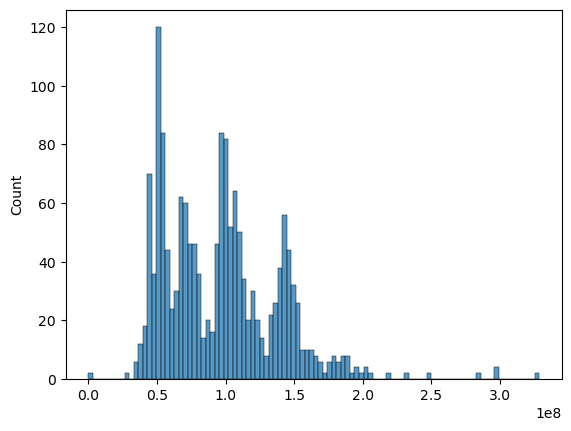

In [42]:
p1 = sns.histplot(adata.layers["raw_counts"].sum(1), bins=100, kde=False)

In [43]:
sc.pp.filter_genes(adata, min_cells = 5)

In [44]:
adata

AnnData object with n_obs × n_vars = 1606 × 6504
    obs: 'Id'
    var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description', 'n_cells'
    layers: 'raw_counts'

In [ ]:
model_cls = scvi.model.SCVI
model_cls.setup_anndata(adata, categorical_covariate_keys = ['Id'],
                             continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

tuner = ModelTuner(model_cls)

In [ ]:
tuner.info()

In [ ]:
search_space = {
    "n_hidden": tune.choice([92, 128, 192, 256]),
    "n_latent": tune.choice([10, 20, 30, 40, 50, 60]),
    "n_layers": tune.choice([1, 2, 3]),
    "lr": tune.loguniform(1e-4, 1e-2),
    "gene_likelihood": tune.choice(["nb", "zinb"])}

In [ ]:
logging_dir = os.path.abspath("G:/ray_logs")

In [ ]:
def short_dirname_creator(trial):
    return f"trial_{trial.trial_id}"

In [ ]:
results = tuner.fit(adata, metric="validation_loss",
                    resources = {'gpu': 1}, #have to specify gpu or might not use
                    search_space = search_space,
                   num_samples = 100,
                   max_epochs = 20,
                    logging_dir = logging_dir
                   )

In [ ]:
best_vl = 10000
best_i = 0
for i, res in enumerate(results.results):
    vl = res.metrics['validation_loss']

    if vl < best_vl:
        best_vl = vl
        best_i = i

In [ ]:
results.results[best_i]

### Run Integration

In [181]:
adata.X

array([[ 25140.2 ,  65314.2 ,   9879.21, ...,      0.  ,   2198.77,
             0.  ],
       [ 38213.8 ,  39348.3 ,   4703.41, ...,      0.  ,   3943.43,
          4780.26],
       [ 37409.  ,  34582.4 ,   4456.29, ...,      0.  ,   4004.28,
          5518.54],
       ...,
       [ 93301.2 , 378847.  ,  11106.3 , ...,   2113.42,  13626.9 ,
             0.  ],
       [142033.  , 511227.  ,      0.  , ...,      0.  ,      0.  ,
             0.  ],
       [137525.  , 438963.  ,  12126.2 , ...,   2894.91,  10761.4 ,
             0.  ]], dtype=float32)

In [182]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [183]:
adata

AnnData object with n_obs × n_vars = 1606 × 6570
    obs: 'Id'
    var: 'Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes', 'First.Protein.Description'
    layers: 'log1p_norm'

In [184]:
print(adata.X.sum())  # Somme de tous les éléments

154698510000.0


In [185]:
adata.X = adata.layers["log1p_norm"]

In [187]:
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)

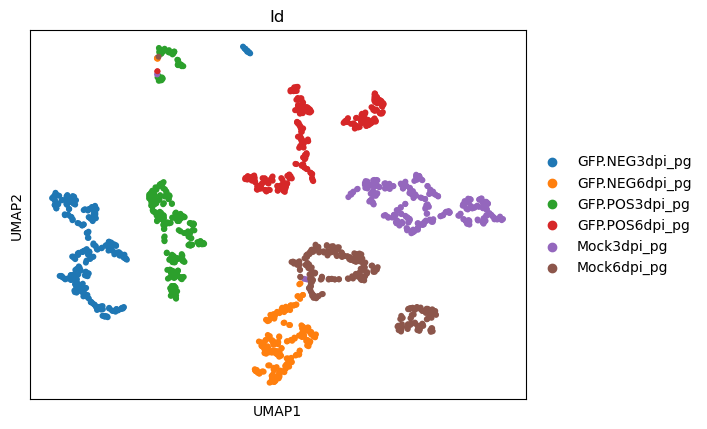

In [188]:
sc.pl.umap(adata, color = 'Id')